## Importing Required Staff

In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [12]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [13]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.627658,-1.981683,-2.147050,-0.990589,-3.417910,1
1,-2.248679,0.051828,-2.788473,-0.973830,-2.201723,0
2,0.969977,-0.715981,-1.730393,0.833808,-0.692632,0
3,-0.937128,0.159636,-1.569471,0.061983,-2.799210,1
4,-0.710733,0.213891,-1.506360,3.055996,-0.780466,1


## Making Function For Sampling

In [14]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [50]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [16]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

## Row Sampling

In [27]:
df1 = sample_rows(df,0.2)

In [28]:
df2 = sample_rows(df,0.2)

In [29]:
df3 = sample_rows(df,0.2)

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [37]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [38]:
from sklearn.tree import plot_tree

[Text(200.88000000000002, 190.26, 'X[3] <= 0.0\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(133.92000000000002, 135.9, 'X[0] <= -1.011\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(200.88000000000002, 81.53999999999999, 'X[0] <= -0.348\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

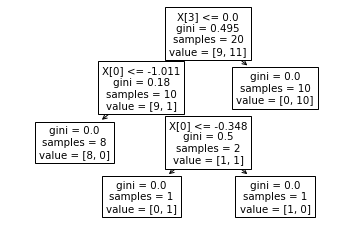

In [39]:
plot_tree(clf1)

[Text(133.92000000000002, 181.2, 'X[1] <= 0.134\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(200.88000000000002, 108.72, 'X[2] <= -0.333\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

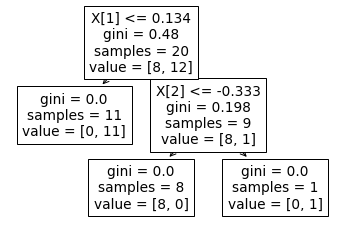

In [40]:
plot_tree(clf2)

[Text(200.88000000000002, 190.26, 'X[3] <= 0.845\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(133.92000000000002, 135.9, 'X[2] <= -0.136\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(200.88000000000002, 81.53999999999999, 'X[0] <= -0.348\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

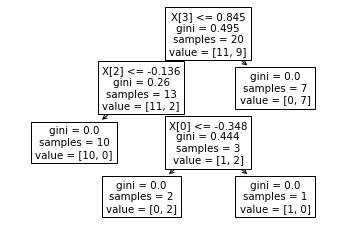

In [41]:
plot_tree(clf3)

In [43]:
clf1.predict(np.array([-0.627658, -1.981683, -2.147050, -0.990589, -3.417910]).reshape(1,5))

array([1])

In [44]:
clf2.predict(np.array([-0.627658, -1.981683, -2.147050, -0.990589, -3.417910]).reshape(1,5))

array([1])

In [45]:
clf3.predict(np.array([-0.627658, -1.981683, -2.147050, -0.990589, -3.417910]).reshape(1,5))

array([0])

## Column Sampling

In [54]:
df1 = sample_features(df,0.8)

C:\Users\STREAM~1\AppData\Local\Temp/ipykernel_10744/3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [55]:
df1 = sample_features(df,0.8)

C:\Users\STREAM~1\AppData\Local\Temp/ipykernel_10744/3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [56]:
df1 = sample_features(df,0.8)

C:\Users\STREAM~1\AppData\Local\Temp/ipykernel_10744/3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [57]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

In [58]:
from sklearn.tree import plot_tree

[Text(163.21500000000003, 203.85, 'X[2] <= -0.433\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(66.96000000000001, 176.67000000000002, 'X[1] <= -1.81\ngini = 0.263\nsamples = 45\nvalue = [7, 38]'),
 Text(33.480000000000004, 149.49, 'X[2] <= -2.101\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(16.740000000000002, 122.31, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(50.220000000000006, 122.31, 'X[0] <= 0.044\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(33.480000000000004, 95.13, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(66.96000000000001, 95.13, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(100.44000000000001, 149.49, 'X[1] <= 0.9\ngini = 0.053\nsamples = 37\nvalue = [1, 36]'),
 Text(83.70000000000002, 122.31, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(117.18, 122.31, 'X[1] <= 1.177\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(100.44000000000001, 95.13, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(133.92000000000002, 95.13, 'gini =

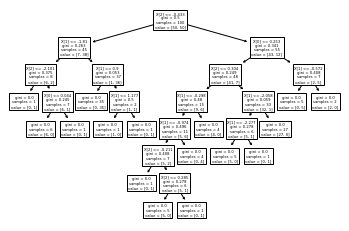

In [59]:
plot_tree(clf1)

[Text(133.92000000000002, 181.2, 'X[1] <= 0.134\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(200.88000000000002, 108.72, 'X[2] <= -0.333\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

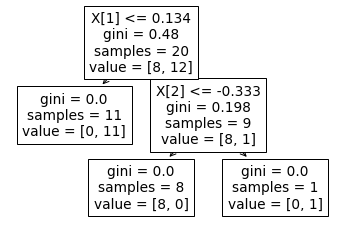

In [60]:
plot_tree(clf2)

[Text(200.88000000000002, 190.26, 'X[3] <= 0.845\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(133.92000000000002, 135.9, 'X[2] <= -0.136\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(200.88000000000002, 81.53999999999999, 'X[0] <= -0.348\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

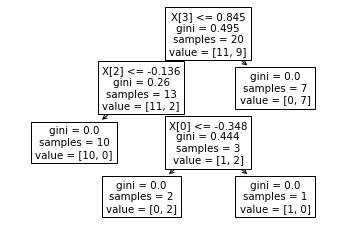

In [61]:
plot_tree(clf3)

In [64]:
clf1.predict(np.array([-0.627658, -1.981683, -2.147050, -0.990589]).reshape(1,4))

array([1])

In [65]:
clf1.predict(np.array([-0.627658, -1.981683, -2.147050, -0.990589]).reshape(1,4))

array([1])

In [66]:
clf1.predict(np.array([-0.627658, -1.981683, -2.147050, -0.990589]).reshape(1,4))

array([1])

## Combined Sampling

In [81]:
df1 = combined_sampling(df,0.5,0.8)

C:\Users\STREAM~1\AppData\Local\Temp/ipykernel_10744/3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [82]:
df2 = combined_sampling(df,0.5,0.8)

C:\Users\STREAM~1\AppData\Local\Temp/ipykernel_10744/3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [83]:
df3 = combined_sampling(df,0.5,0.8)

C:\Users\STREAM~1\AppData\Local\Temp/ipykernel_10744/3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [84]:
df3

,col2,col4,col1,col3,target
64,0.389262,-0.963307,-1.445821,-0.986347,0
64,0.389262,-0.963307,-1.445821,-0.986347,0
82,-0.073764,-0.061116,-1.254412,-0.971569,0
72,3.360769,-2.352969,0.456015,-2.768014,0
25,1.616684,-1.564284,-0.236840,0.553098,0
47,0.172671,0.717052,-1.417035,-3.109151,0
46,1.633056,-0.038593,0.645090,-0.258079,0
86,-1.136651,0.130055,-2.578430,1.298596,0
73,-1.911579,-0.065222,-2.531472,1.174531,0
36,-1.623996,1.923189,0.320514,-2.513520,1


In [75]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

In [76]:
from sklearn.tree import plot_tree

[Text(191.31428571428572, 203.85, 'X[1] <= 0.71\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(143.4857142857143, 176.67000000000002, 'X[0] <= 0.739\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(95.65714285714286, 149.49, 'X[0] <= -2.716\ngini = 0.284\nsamples = 35\nvalue = [6, 29]'),
 Text(47.82857142857143, 122.31, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(143.4857142857143, 122.31, 'X[1] <= -0.265\ngini = 0.213\nsamples = 33\nvalue = [4, 29]'),
 Text(95.65714285714286, 95.13, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(191.31428571428572, 95.13, 'X[1] <= 0.088\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(143.4857142857143, 67.94999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(239.14285714285714, 67.94999999999999, 'X[3] <= -0.818\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(191.31428571428572, 40.77000000000001, 'X[1] <= 0.274\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(143.4857142857143, 13.590000000000003, 'gini

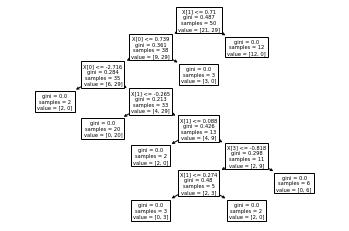

In [77]:
plot_tree(clf1)

[Text(133.92000000000002, 181.2, 'X[1] <= 0.134\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(200.88000000000002, 108.72, 'X[2] <= -0.333\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

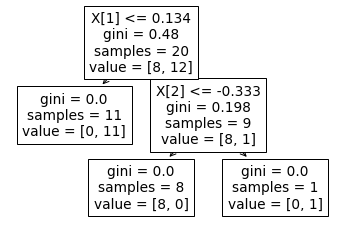

In [78]:
plot_tree(clf2)

[Text(200.88000000000002, 190.26, 'X[3] <= 0.845\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(133.92000000000002, 135.9, 'X[2] <= -0.136\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(200.88000000000002, 81.53999999999999, 'X[3] <= -1.042\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

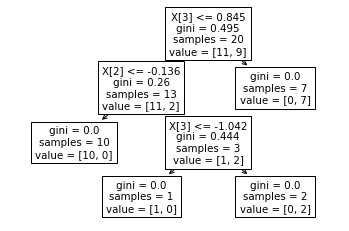

In [79]:
plot_tree(clf3)

In [85]:
clf1.predict(np.array([0.389262,-0.963307,-1.445821,-0.986347]).reshape(1,4))

array([1])

In [86]:
clf2.predict(np.array([0.389262,-0.963307,-1.445821,-0.986347]).reshape(1,4))

array([1])

In [87]:
clf3.predict(np.array([0.389262,-0.963307,-1.445821,-0.986347]).reshape(1,4))

array([0])